In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler



In [2]:
df = pd.read_csv('/content/data_bersih.csv')
df.head()

,nama_usaha,jenis_usaha,tenaga_kerja_perempuan,tenaga_kerja_laki_laki,aset,omset,marketplace,kapasitas_produksi,status_legalitas,tahun_berdiri,laba,biaya_karyawan,jumlah_pelanggan
0,UD. Alif Pamungkas,Kesehatan,1.0,56.0,5497149.0,3347794.0,Tokopedia,479.0,Belum Terdaftar,2015.0,-2149355.0,171000000.0,479.0
1,UD. Zidanar Panji,Perdagangan,5.0,44.0,7398384.0,39969661.0,Bukalapak,464.0,Terdaftar,2014.0,32571277.0,147000000.0,464.0
2,UD. Winda Jayengprana,Jasa,74.0,51.0,8881762.0,25253355.0,Website Sendiri,383.0,Belum Terdaftar,2000.0,16371593.0,375000000.0,383.0
3,UD. Damaris Satria,Jasa,89.0,5.0,9576178.0,20700389.0,Website Sendiri,986.0,Belum Terdaftar,2003.0,11124211.0,282000000.0,986.0
4,UD. Qasya Wiratama,Jasa,91.0,59.0,9456853.0,4820810.0,Lazada,314.0,Belum Terdaftar,2002.0,-4636043.0,450000000.0,314.0


In [3]:
df.describe()

,tenaga_kerja_perempuan,tenaga_kerja_laki_laki,aset,omset,kapasitas_produksi,tahun_berdiri,laba,biaya_karyawan,jumlah_pelanggan
count,13564.000000,13564.000000,1.356400e+04,1.356400e+04,13564.000000,13564.000000,1.356400e+04,1.356400e+04,13564.000000
mean,49.678694,49.122855,5.222395e+06,2.555837e+07,499.663374,2012.028251,2.032810e+07,2.963467e+08,499.694869
std,29.008733,29.011920,2.724637e+06,1.419725e+07,285.312905,7.236513,1.449203e+07,1.227705e+08,285.268817
min,0.000000,0.000000,5.002330e+05,1.000509e+06,10.000000,2000.000000,-8.838836e+06,0.000000e+00,10.000000
25%,24.000000,24.000000,2.864666e+06,1.326694e+07,250.000000,2006.000000,8.021135e+06,2.070000e+08,250.000000
50%,50.000000,49.000000,5.209905e+06,2.560593e+07,501.000000,2012.000000,2.044722e+07,2.970000e+08,501.000000
75%,75.000000,74.000000,7.552898e+06,3.770064e+07,746.000000,2018.000000,3.263729e+07,3.840000e+08,746.000000
max,99.000000,99.000000,9.999760e+06,4.999970e+07,999.000000,2024.000000,4.919930e+07,5.940000e+08,999.000000


In [5]:


kolom_numerik = df.select_dtypes(include=np.number).columns.tolist()
kolom_kategorik = df.select_dtypes(include='object').columns.tolist()

print("Kolom Numerik:", kolom_numerik)
print("Kolom Kategorik:", kolom_kategorik)

Kolom Numerik: ['tenaga_kerja_perempuan', 'tenaga_kerja_laki_laki', 'aset', 'omset', 'kapasitas_produksi', 'tahun_berdiri', 'laba', 'biaya_karyawan', 'jumlah_pelanggan']
Kolom Kategorik: ['nama_usaha', 'jenis_usaha', 'marketplace', 'status_legalitas']


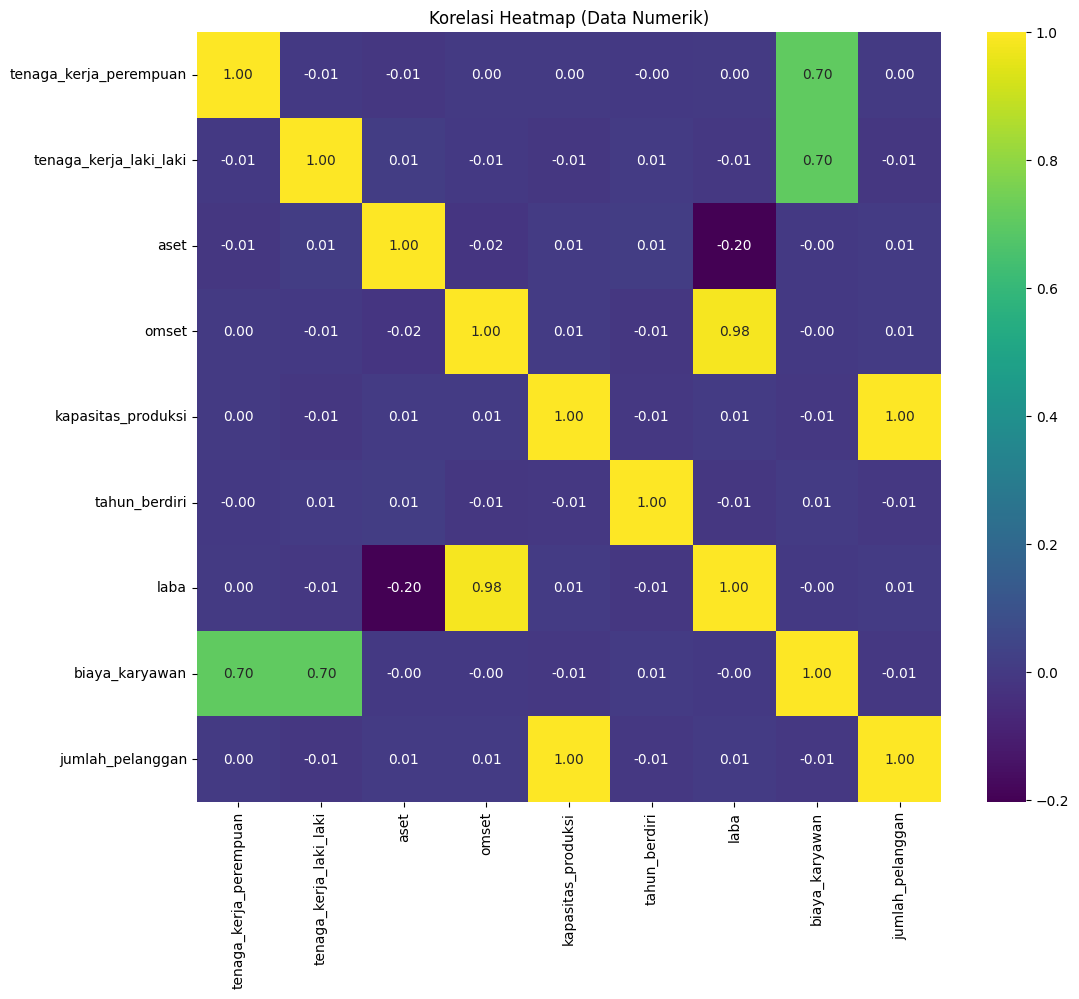

In [6]:
correlation_matrix = df[kolom_numerik].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Korelasi Heatmap (Data Numerik)')
plt.show()

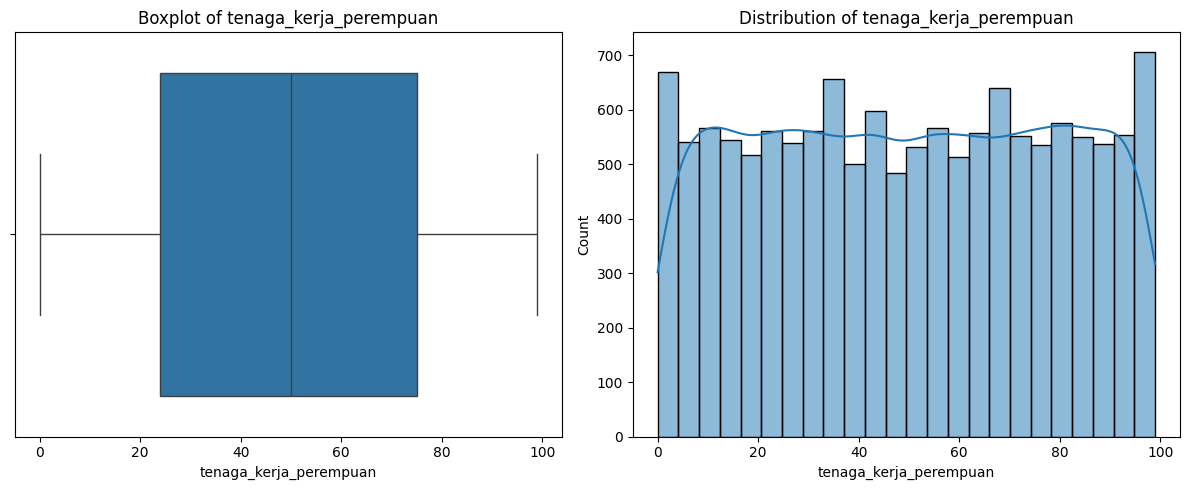

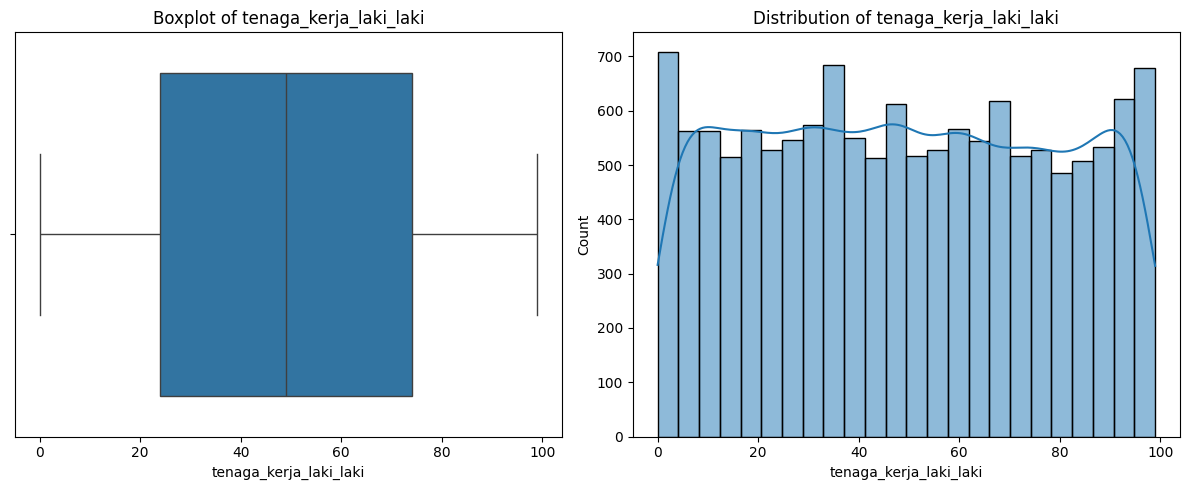

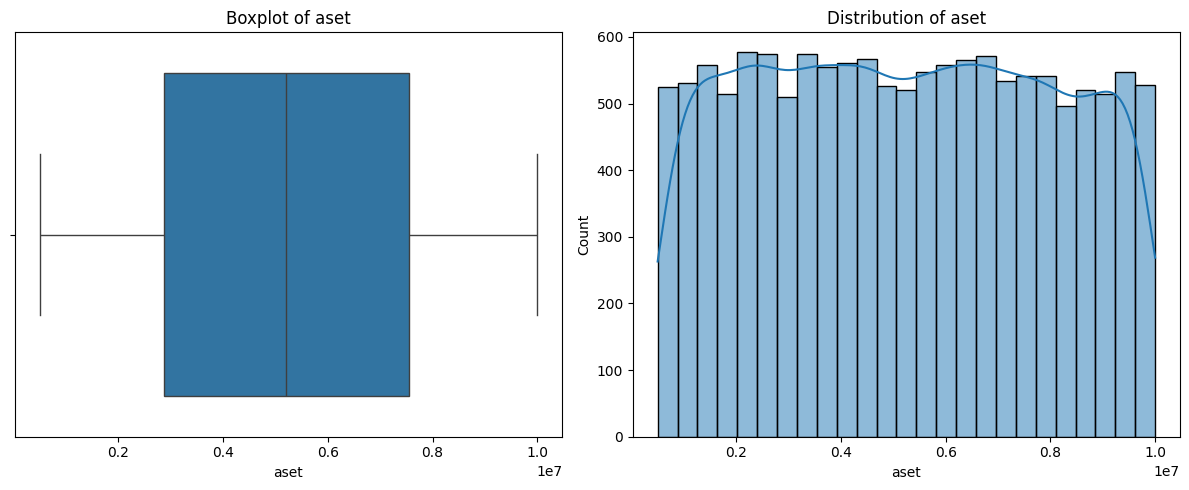

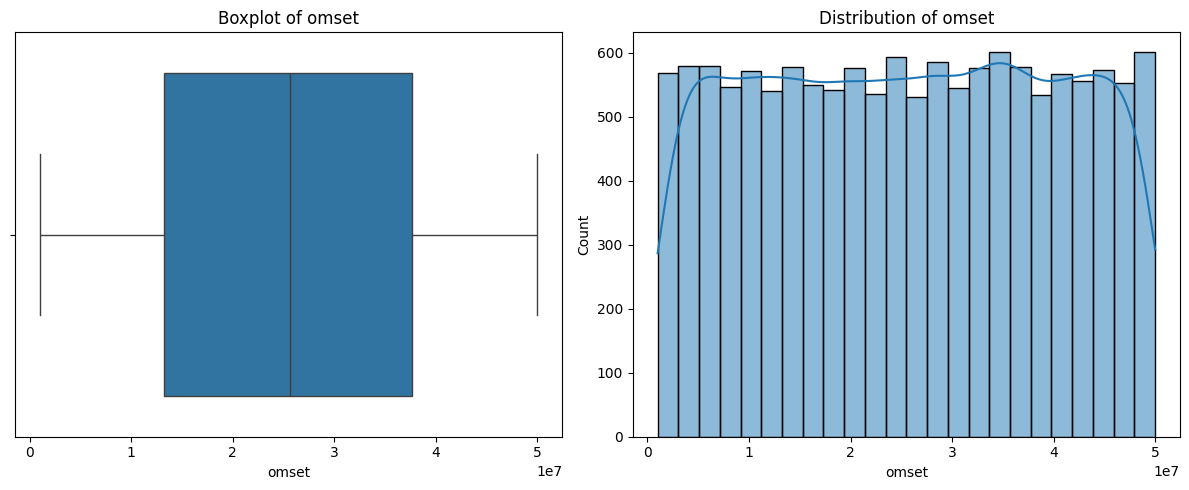

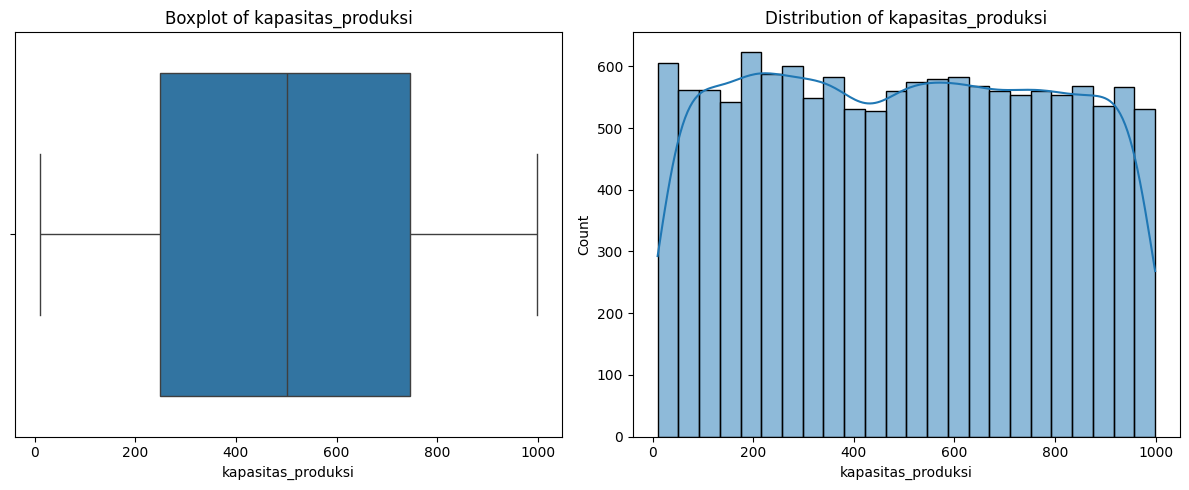

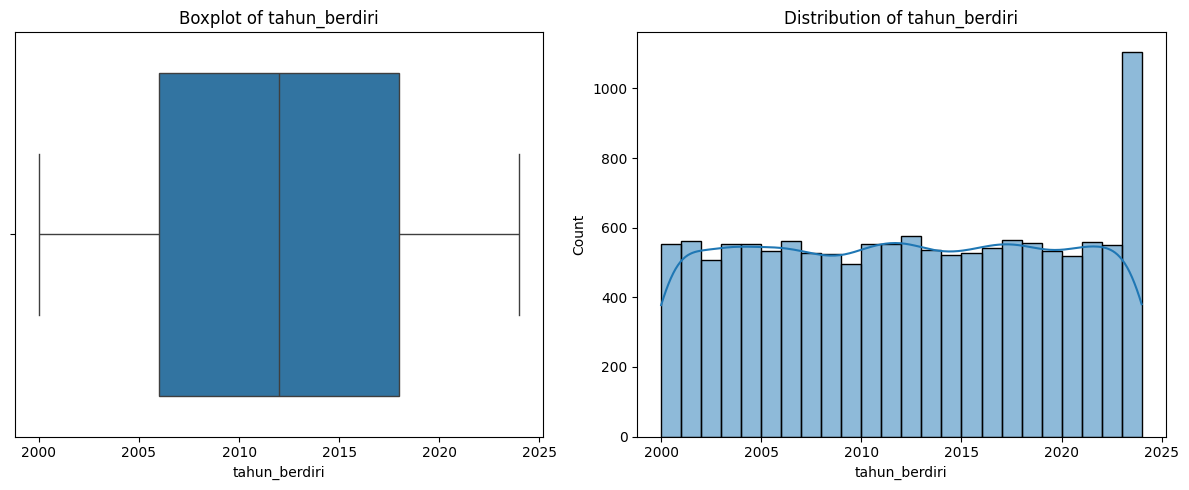

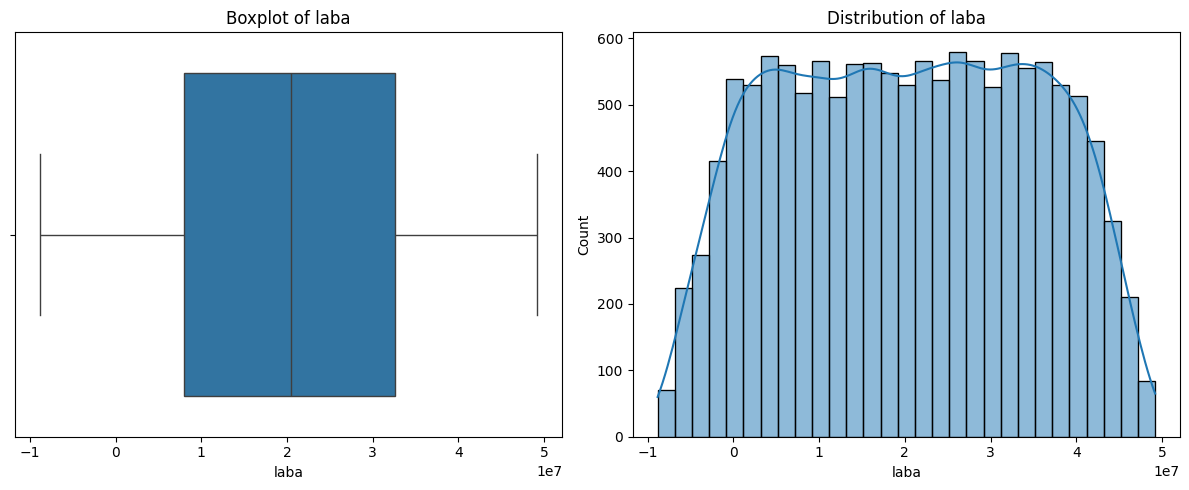

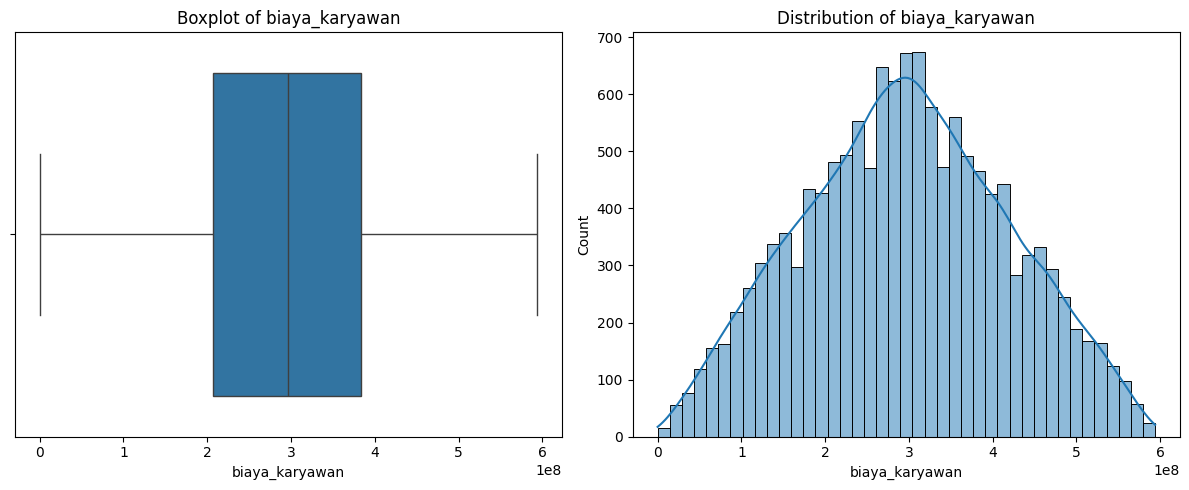

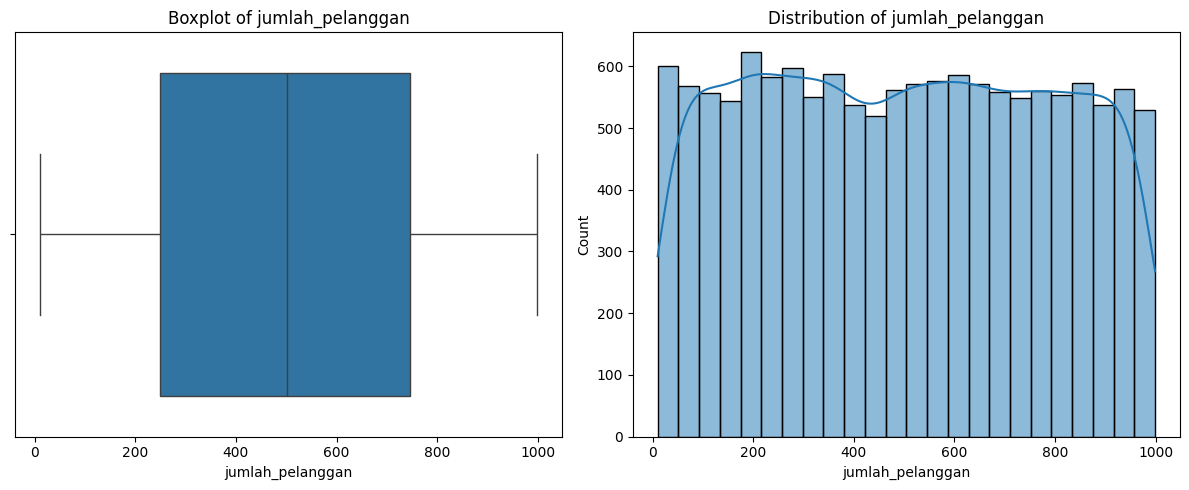

In [7]:
# Visualize numerical features with boxplots and histograms
for col in kolom_numerik:
    plt.figure(figsize=(12, 5))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    # Histogram
    plt.subplot(1, 2, 2)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

    plt.tight_layout()
    plt.show()

kolom yang memiliki korelasi tinggi adalah

- `biaya_karyawan` dengan `tenaga_kerja_perempuan` & `tenaga_kerja_laki_laki`: **0,7**
- `jumlah pelanggan` dengan `kapasitas produksi`: **1**
- `omset` dengan `laba`: **0,98**

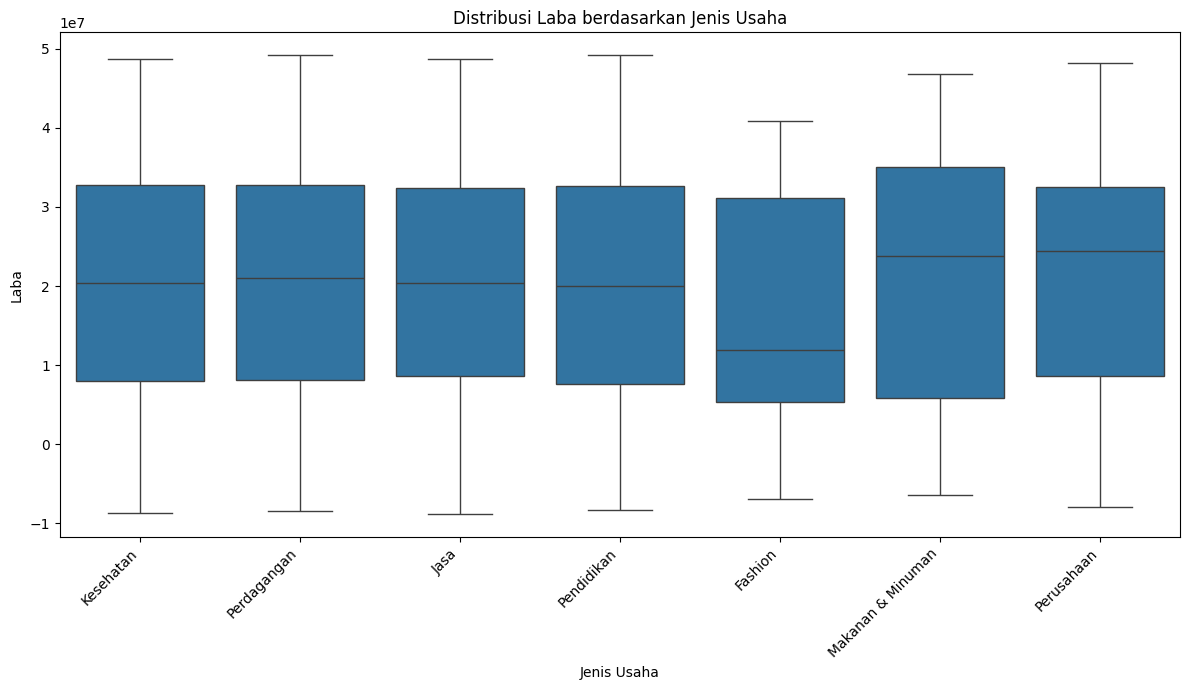


--- Rata-rata Laba per Jenis Usaha ---
jenis_usaha
Makanan & Minuman    2.110524e+07
Perusahaan           2.100433e+07
Perdagangan          2.049998e+07
Jasa                 2.041213e+07
Kesehatan            2.029969e+07
Pendidikan           2.009750e+07
Fashion              1.669068e+07
Name: laba, dtype: float64


In [8]:
# Rata-rata Laba berdasarkan Jenis Usaha
if 'jenis_usaha' in df.columns and 'laba' in df.columns:
    plt.figure(figsize=(12, 7))
    sns.boxplot(x='jenis_usaha', y='laba', data=df, showfliers=False) # showfliers=False untuk tidak menampilkan outlier agar lebih jelas
    plt.title('Distribusi Laba berdasarkan Jenis Usaha')
    plt.xlabel('Jenis Usaha')
    plt.ylabel('Laba')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Jenis usaha dengan rata-rata laba tertinggi/terendah
    print("\n--- Rata-rata Laba per Jenis Usaha ---")
    laba_per_jenis_usaha = df.groupby('jenis_usaha')['laba'].mean().sort_values(ascending=False)
    print(laba_per_jenis_usaha)

<ipython-input-9-2c774305b817>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='marketplace', y='omset', data=df, estimator=np.mean, ci=None) # ci=None untuk menghilangkan error bar


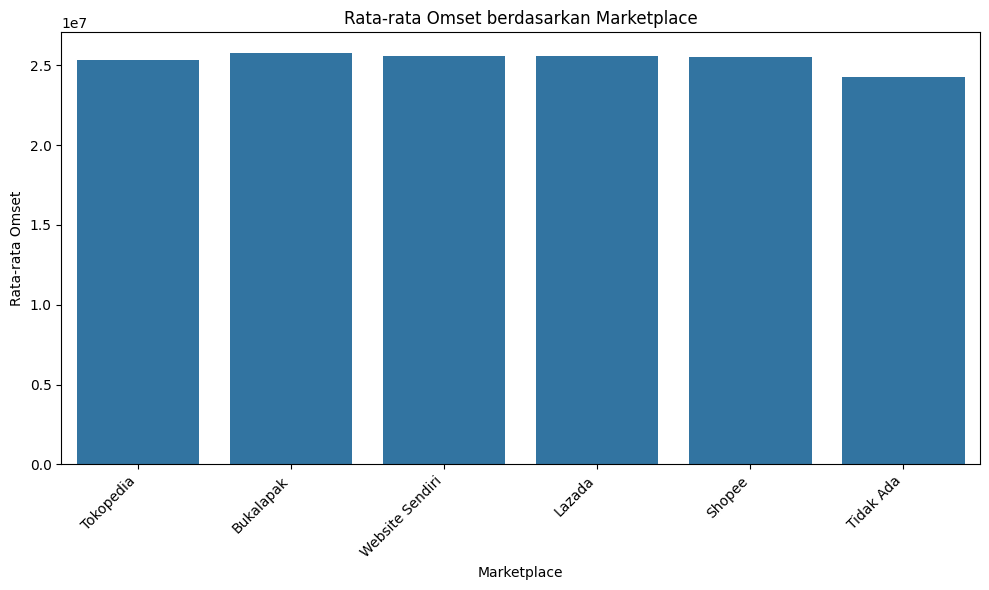


--- Rata-rata Omset per Marketplace ---
marketplace
Bukalapak          2.578364e+07
Lazada             2.559038e+07
Website Sendiri    2.557731e+07
Shopee             2.555641e+07
Tokopedia          2.535124e+07
Tidak Ada          2.425409e+07
Name: omset, dtype: float64


In [9]:
# Rata-rata Omset berdasarkan Marketplace
if 'marketplace' in df.columns and 'omset' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='marketplace', y='omset', data=df, estimator=np.mean, ci=None) # ci=None untuk menghilangkan error bar
    plt.title('Rata-rata Omset berdasarkan Marketplace')
    plt.xlabel('Marketplace')
    plt.ylabel('Rata-rata Omset')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print("\n--- Rata-rata Omset per Marketplace ---")
    omset_per_marketplace = df.groupby('marketplace')['omset'].mean().sort_values(ascending=False)
    print(omset_per_marketplace)

In [10]:
# Feature Engineering total tenaga kerja atau profit margin
if 'tenaga_kerja_perempuan' in df.columns and 'tenaga_kerja_laki_laki' in df.columns:
    df['total_tenaga_kerja'] = df['tenaga_kerja_perempuan'] + df['tenaga_kerja_laki_laki']
if 'laba' in df.columns and 'omset' in df.columns:
    # Hindari pembagian dengan nol atau omset negatif/sangat kecil
    df['profit_margin'] = np.where(df['omset'] > 0, (df['laba'] / df['omset']) * 100, 0)

In [11]:
features_for_clustering = ['aset', 'omset', 'laba', 'total_tenaga_kerja', 'kapasitas_produksi', 'jumlah_pelanggan', 'profit_margin']
features_for_clustering = [f for f in features_for_clustering if f in df.columns and df[f].isnull().sum() == 0]

print(f"\nFitur yang akan digunakan untuk clustering: {features_for_clustering}")
df_cluster = df[features_for_clustering].copy()


Fitur yang akan digunakan untuk clustering: ['aset', 'omset', 'laba', 'total_tenaga_kerja', 'kapasitas_produksi', 'jumlah_pelanggan', 'profit_margin']


In [14]:
if df_cluster.empty:
    print("Tidak ada fitur valid yang terpilih untuk clustering. Periksa kembali data Anda.")
else:
    # --- 3. SCALING FITUR NUMERIK ---
    # K-Means sensitif terhadap skala data, jadi penskalaan penting.
    scaler = StandardScaler()
    df_cluster_scaled = scaler.fit_transform(df_cluster)
    df_cluster_scaled = pd.DataFrame(df_cluster_scaled, columns=features_for_clustering)

    print("\n--- Data Setelah Scaling (5 baris pertama) ---")
    print(df_cluster_scaled.head())


--- Data Setelah Scaling (5 baris pertama) ---
       aset     omset      laba  total_tenaga_kerja  kapasitas_produksi  \
0  0.100844 -1.564486 -1.551079           -1.021644           -0.072426   
1  0.798664  1.015114  0.844852           -1.217167           -0.125002   
2  1.343115 -0.021485 -0.273023            0.640299           -0.408911   
3  1.597990 -0.342190 -0.635123           -0.117351            1.704636   
4  1.554194 -1.460728 -1.722675            1.251307           -0.650760   

   jumlah_pelanggan  profit_margin  
0         -0.072548      -1.668115  
1         -0.125132       0.322856  
2         -0.409085       0.095179  
3          1.704789      -0.056376  
4         -0.650971      -2.104938  


In [15]:

df_cluster_scaled.to_csv('dataset_scaled.csv', index=False)